In [1]:
import pandas as pd
import csv
import sys
import numpy as np
pd.set_option('display.max_columns', None)

deaths= pd.read_excel('Data_deaths.xlsx')
od2014 = pd.read_csv("Monthly_Counts_of_Deaths_by_Select_Causes__2014-2019.csv")
od2020 = pd.read_csv("Monthly_Provisional_Counts_of_Deaths_by_Select_Causes__2020-2023.csv")

csv.field_size_limit(sys.maxsize)

#Load data
data= pd.read_csv('opiates_allcomments_LIWC.csv',engine='python',chunksize=1000)
df_comments = pd.concat(data)


In [28]:
#Rename columns
df_comments1 = df_comments.rename(columns={'A':'User','B':'Body','D':'Score','F':'Timestamp','G':'Year','H':'Month'})

# Pre Processing

In [29]:
#Load overdose data and combine
df = od2014[['Year','Month','Drug Overdose']]
df2= od2020[['Year','Month','Drug Overdose']]
df.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)
death_data = [df,df2]
overdoseMonthly = pd.concat(death_data)

#Replace Nan with mean overdoses
mean_value=round(overdoseMonthly['Drug Overdose'].mean(),2)
overdoseMonthly['Drug Overdose'].fillna(value=6171, inplace=True)

#From https://www.cdc.gov/drugoverdose/deaths/index.html Opioids were involved in 68,630 overdose deaths in 2020 (74.8% of all drug overdose deaths). We make an assumption that this is standard rate from 2014-2022
overdoseMonthly['Drug Overdose'] = round(overdoseMonthly['Drug Overdose'] * 0.75)
overdoseMonthly


,Year,Month,Drug Overdose
0,2014,1,3020.0
1,2015,1,3266.0
2,2016,1,3473.0
3,2017,1,4675.0
4,2018,1,4244.0
...,...,...,...
31,2022,8,6248.0
32,2022,9,4628.0
33,2022,10,4628.0
34,2022,11,4628.0


In [30]:
#Get convert Month form YYYY-MM -> MM
df_comments1["Month"]= df_comments1["Month"].str[5:].astype("int")
df_comments1.head()

,User,Body,C,Score,E,Timestamp,Year,Month,I,J,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,ppron,i,we,you,shehe,they,ipron,article,prep,auxverb,adverb,conj,negate,verb,adj,compare,interrog,number,quant,affect,posemo,negemo,anx,anger,sad,social,family,friend,female,male,cogproc,insight,cause,discrep,tentat,certain,differ,percept,see,hear,feel,bio,body,health,sexual,ingest,drives,affiliation,achieve,power,reward,risk,focuspast,focuspresent,focusfuture,relativ,motion,space,time,work,leisure,home,money,relig,death,informal,swear,netspeak,assent,nonflu,filler,AllPunc,Period,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,[deleted],at bonnaroo. it smelled like flowers but I did...,1308881233,1,opiates,2011-06-23 22:07:13,2011,6,c21kc5y,t3_g8qw3,17,7.44,1.00,91.95,1.00,5.67,23.53,82.35,58.82,17.65,5.88,5.88,0.0,0.00,0.0,0.00,11.76,0.00,11.76,23.53,0.00,5.88,5.88,29.41,11.76,5.88,0.00,0.0,0.00,5.88,0.00,5.88,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,17.65,0.00,0.00,0.00,5.88,0.00,11.76,5.88,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,11.76,0.0,0.00,5.88,5.88,0.00,11.76,11.76,5.88,11.76,0.00,11.76,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,29.41,17.65,0.00,0.00,0.0,0.0,0.0,0.00,0.0,5.88,0.00,5.88
1,nvrwastetree,Lol methadone....abiet old school??,1308877576,1,opiates,2011-06-23 21:06:16,2011,6,c21jzhv,t1_c21iap8,5,93.26,50.00,43.37,99.00,5.00,20.00,60.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,20.00,20.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20.00,0.00,0.00,20.00,20.00,0.00,0.00,0.0,0.0,0.0,20.00,0.00,20.0,0.00,0.00,0.0,120.00,80.00,0.00,0.00,0.0,40.0,0.0,0.00,0.0,0.00,0.00,0.00
2,ttd,Immodium (loperamide) does in fact have activi...,1308861650,1,opiates,2011-06-23 16:40:50,2011,6,c21iap8,t3_i7bwt,138,76.43,23.44,54.89,78.80,19.71,20.29,84.78,50.72,15.22,4.35,3.62,0.0,0.00,0.0,0.72,10.87,5.80,16.67,7.25,2.17,7.25,1.45,13.04,5.80,2.17,0.72,2.9,2.90,4.35,3.62,0.72,0.0,0.72,0.0,2.17,0.0,0.0,0.0,0.0,13.77,1.45,2.17,2.17,3.62,2.17,3.62,0.00,0.0,0.0,0.00,7.97,0.72,4.35,0.0,3.62,7.25,0.0,0.00,3.62,2.17,1.45,4.35,7.97,0.00,15.22,0.72,6.52,7.97,1.45,0.72,0.00,0.0,0.0,0.0,2.17,0.72,0.0,0.72,0.72,0.0,17.39,5.07,3.62,0.72,0.0,0.0,0.0,0.72,0.0,2.17,4.35,0.72
3,nvrwastetree,Heard of this as well...,1308854583,1,opiates,2011-06-23 14:43:03,2011,6,c21hdq2,t1_c21h7r4,5,52.71,97.69,1.00,99.00,5.00,0.00,100.00,80.00,20.00,0.00,0.00,0.0,0.00,0.0,0.00,20.00,0.00,40.00,0.00,20.00,20.00,0.00,20.00,20.00,20.00,0.00,0.0,0.00,20.00,20.00,0.00,0.0,0.00,0.0,20.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20.00,0.0,20.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,20.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,20.00,0.00,0.0,0.00,20.00,0.0,60.00,60.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00
4,enthreeoh,You're getting placebo effect. Immodium is an ...,1308853226,4,opiates,2011-06-23 14:20:26,2011,6,c21h7r4,t3_i7bwt,112,21.19,5.42,94.05,25.77,14.00,16.07,85.71,58.93,20.54,10.71,8.04,0.0,2.68,0.0,0.00,9.82,6.25,12.50,12.50,6.25,6.25,5.36,21.43,5.36,2.68,0.89,0.0,4.46,1.79,0.89,0.89,0.0,0.89,0.0,2.68,0.0,0.0,0.0,0.0,16.96,5.36,1.79,0.89,0.89,1.79,7.14,1.79,0.0,0.0,0.89,2.68,2.68,0.00,0.0,0.00,6.25,0.0,1.79,1.79,2.68,0.00,6.25,12.50,0.89,10.71,0.00,7.14,3.57,0.89,0.00,0.89,0.0,0.0,0.0,0.89,0.89,0.0,0.00,0.00,0.0,16.07,7.14,0.00,0.00,0.0,0.0,0.0,0.00,0.0,8.93,0.00,0.00


### Create DF's

In [31]:
#Convert Month form YYYY-MM -> MM
df_comments3=df_comments1
df_comments3=df_comments3.groupby(by=['Year','Month']).mean()

/var/folders/7t/f9kzz9ps7550yjz7_s6y78240000gq/T/ipykernel_63337/358837912.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_comments2=df_comments2.groupby(by=['Year','Month']).sum()
/var/folders/7t/f9kzz9ps7550yjz7_s6y78240000gq/T/ipykernel_63337/358837912.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_comments3=df_comments3.groupby(by=['Year','Month']).mean()


In [32]:
#Combine od and comments df's
df_all= pd.merge(df_comments1,overdoseMonthly,on=['Month','Year']).drop(columns=['C','E','I','J'])
df_avg= pd.merge(df_comments3,overdoseMonthly,on=['Month','Year']).drop(columns=['C'])



In [7]:
df_all

,User,Body,Score,Timestamp,Year,Month,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,ppron,i,we,you,shehe,they,ipron,article,prep,auxverb,adverb,conj,negate,verb,adj,compare,interrog,number,quant,affect,posemo,negemo,anx,anger,sad,social,family,friend,female,male,cogproc,insight,cause,discrep,tentat,certain,differ,percept,see,hear,feel,bio,body,health,sexual,ingest,drives,affiliation,achieve,power,reward,risk,focuspast,focuspresent,focusfuture,relativ,motion,space,time,work,leisure,home,money,relig,death,informal,swear,netspeak,assent,nonflu,filler,AllPunc,Period,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP,Drug Overdose
0,i_fucking_love_dope,Yuppy Yup!,1,2015-06-23 23:58:16,2015,6,2,93.26,50.00,1.00,25.77,2.00,0.00,50.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,50.00,0.00,50.00,50.00,0.00,0.00,50.00,0.00,0.00,0.0,0.0,0.00,50.00,0.00,0.0,0.00,0.0,0.0,3132.0
1,jaynumbernine,And I would take them 4-5 hours before bed to ...,2,2015-06-23 23:58:00,2015,6,18,10.01,13.32,58.07,98.27,18.00,0.00,88.89,61.11,16.67,16.67,5.56,0.00,0.00,0.00,11.11,0.00,0.00,11.11,5.56,11.11,11.11,5.56,11.11,5.56,5.56,0.00,11.11,0.00,5.56,5.56,0.00,0.00,0.00,0.00,11.11,0.00,0.00,0.00,0.00,16.67,0.00,0.00,5.56,0.00,0.00,11.11,0.00,0.00,0.00,0.00,5.56,5.56,0.00,0.00,0.00,5.56,0.00,0.00,0.00,5.56,0.00,0.00,5.56,0.00,11.11,0.00,0.00,11.11,0.00,0.00,5.56,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,11.11,5.56,0.00,0.0,0.0,0.00,0.00,5.56,0.0,0.00,0.0,0.0,3132.0
2,i_fucking_love_dope,Yeah. I wouldn't worry. Don't make it obvious ...,1,2015-06-23 23:56:43,2015,6,30,8.69,25.24,23.51,25.77,6.00,13.33,90.00,53.33,23.33,10.00,3.33,0.00,6.67,0.00,0.00,13.33,3.33,10.00,13.33,3.33,3.33,10.00,26.67,3.33,3.33,0.00,0.00,3.33,6.67,3.33,3.33,3.33,0.00,0.00,6.67,0.00,0.00,0.00,0.00,23.33,0.00,6.67,3.33,0.00,6.67,6.67,0.00,0.00,0.00,0.00,3.33,3.33,0.00,0.00,0.00,6.67,0.00,0.00,3.33,0.00,3.33,0.00,20.00,3.33,10.00,3.33,6.67,0.00,0.00,0.00,0.00,0.00,0.00,0.0,3.33,0.00,0.00,3.33,0.00,0.00,33.33,13.33,3.33,0.0,0.0,0.00,3.33,0.00,0.0,13.33,0.0,0.0,3132.0
3,momo45678,Wow. I'm really happy to hear you're doing wel...,2,2015-06-23 23:56:38,2015,6,295,21.78,44.62,76.95,80.93,14.05,11.53,90.17,57.97,21.02,15.93,10.85,0.34,0.68,3.73,0.34,5.08,5.08,11.53,9.83,8.47,7.80,1.36,21.36,2.71,1.02,2.71,2.03,2.37,7.12,5.08,2.03,0.00,0.68,0.34,11.86,0.34,0.34,3.73,0.34,9.15,1.36,3.05,1.36,1.69,1.02,1.69,1.02,0.34,0.68,0.00,4.41,0.68,2.37,0.00,0.34,9.15,3.39,1.02,1.69,2.03,1.69,3.39,16.27,1.02,16.61,2.37,6.10,9.15,0.68,0.34,0.00,0.68,0.34,0.0,1.02,0.34,0.00,0.00,0.34,0.34,16.95,7.80,4.07,0.0,0.0,0.00,0.00,0.00,0.0,5.08,0.0,0.0,3132.0
4,BlackQueenCleopatra,I was fine after 5 days.,2,2015-06-23 23:54:42,2015,6,6,62.04,4.80,99.00,99.00,6.00,0.00,83.33,50.00,16.67,16.67,16.67,0.00,0.00,0.00,0.00,0.00,0.00,16.67,16.67,0.00,0.00,0.00,16.67,33.33,16.67,0.00,16.67,0.00,16.67,16.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,16.67,0.00,0.00,33.33,0.00,0.00,33.33,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,16.67,16.67,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,3132.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3483574,Chance-Specialist983,Sorry you had to go through that shit. Sorry f...,1,2022-08-01 00:02:

In [40]:
df_avg.describe()

,Month,Year,Score,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,ppron,i,we,you,shehe,they,ipron,article,prep,auxverb,adverb,conj,negate,verb,adj,compare,interrog,number,quant,affect,posemo,negemo,anx,anger,sad,social,family,friend,female,male,cogproc,insight,cause,discrep,tentat,certain,differ,percept,see,hear,feel,bio,body,health,sexual,ingest,drives,affiliation,achieve,power,reward,risk,focuspast,focuspresent,focusfuture,relativ,motion,space,time,work,leisure,home,money,relig,death,informal,swear,netspeak,assent,nonflu,filler,AllPunc,Period,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP,Drug Overdose
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,6.413462,2017.884615,1.859757,40.223898,42.351541,46.203763,48.158924,45.534980,12.326346,12.977385,85.684696,50.337735,16.817349,10.423448,5.378120,0.295992,3.425566,0.607160,0.717675,6.384923,4.825863,10.182643,9.884439,6.181278,5.745559,2.638156,18.390383,5.521414,2.589788,1.611629,1.903969,2.287636,9.155073,5.939199,3.172472,0.284137,1.448464,0.471325,8.893805,0.332410,0.497860,0.301853,1.106015,13.162241,2.207596,1.745482,1.835182,3.590143,1.915240,3.861788,2.606367,0.778450,0.612044,0.849235,3.983427,1.080347,1.697575,0.553018,0.783933,6.795604,1.339013,1.175120,1.987035,2.263454,0.647859,3.304239,12.929007,1.361238,11.151037,1.399299,5.385062,4.473975,1.054691,0.662943,0.168882,0.626129,0.290395,0.198512,5.936362,1.523437,2.977646,1.116639,0.442415,0.082636,20.762230,8.463285,2.474524,0.111480,0.137663,1.699624,1.683992,0.360189,0.402285,3.463662,0.430963,1.534361,4635.634615
std,3.417859,2.551633,0.530004,5.646688,0.929974,1.466175,1.187217,0.840936,1.159794,0.482550,0.504120,0.707455,0.271231,0.231476,0.340812,0.033771,0.241027,0.115106,0.055361,0.113680,0.095554,0.235681,0.236691,0.114490,0.300444,0.169230,0.305641,0.120216,0.110604,0.068023,0.104412,0.071124,0.602531,0.455912,0.190388,0.028950,0.239031,0.031628,0.242729,0.054083,0.069149,0.068839,0.138335,0.508152,0.117579,0.139813,0.097369,0.182185,0.063063,0.218946,0.199586,0.185298,0.052497,0.064724,0.130709,0.119561,0.320378,0.152363,0.061531,0.205925,0.099550,0.073183,0.048267,0.085192,0.074095,0.113754,0.276132,0.118372,0.221186,0.044802,0.176357,0.147688,0.056512,0.085980,0.028302,0.097910,0.046577,0.024213,0.645013,0.268302,0.375086,0.093547,0.063670,0.007624,1.876199,1.268427,0.184182,0.055582,0.024820,0.190068,0.342772,0.054554,0.076705,0.093753,0.089659,0.421962,1292.458912
min,1.000000,2014.000000,0.999956,30.722798,38.869545,42.197435,45.229643,43.677966,10.721394,12.246881,84.392699,48.734865,16.146501,9.683705,4.683236,0.237693,2.691813,0.350963,0.566451,6.099597,4.529927,9.486710,9.471775,5.954012,5.257781,2.366466,17.875914,5.286942,2.386907,1.461752,1.677788,2.084896,7.855314,4.919087,2.750795,0.238767,0.961452,0.390904,8.204933,0.166039,0.352919,0.165963,0.808187,12.278339,1.806299,1.559581,1.648679,3.147228,1.645777,3.523945,2.224307,0.474864,0.490273,0.7

In [11]:
df['Drug Overdose'].describe()

count      72.000000
mean     5157.291667
std       793.379408
min      3733.000000
25%      4435.000000
50%      5477.500000
75%      5820.000000
max      6299.000000
Name: Drug Overdose, dtype: float64

# Statistical Analysis and Data Visualizations

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from scipy.stats import kstest
from scipy import stats
warnings.filterwarnings("ignore")

#Plot a distribution
def plot_distribution(inp):
    plt.figure()
    ax = sns.distplot(inp)
    plt.axvline(np.mean(inp), color="k", linestyle="dashed", linewidth=5)
    _, max_ = plt.ylim()
    plt.text(
        inp.mean() + inp.mean() / 10,
        max_ - max_ / 10,
        "Mean: {:.2f}".format(inp.mean()),
    )
    return plt.figure

#Normality tests
def ttest_analysis(distr_1, distr_2, alpha=0.05):
    stat, p = ttest_ind(distr_1, distr_2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('Same distributions (fail to reject H0)\n')
    else:
        print('Different distributions (reject H0)\n')

def ktest_analysis(distr_1, distr_2,alpha=0.05):
    stat, p = stats.ks_2samp(distr_1,distr_2)
    print('\nStatistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('Same distributions (fail to reject H0)\n')
    else:
        print('Different distributions (reject H0)\n')

colors = ['g','black','r','b','orange','purple']

#Used to compare different features from the same dataframe
def compare_distr_features(df,feature_list):
    plt.figure(figsize=(10,8))
    for i,j in enumerate(feature_list):
        ax1 = sns.distplot(df[j],color=colors[i],label='{}'.format(j))
        plt.axvline(np.mean(df[j]), color=colors[i], linestyle='dashed', linewidth=5,label='{} Mean: {:.2f}'.format(j,np.mean(df[j])))
    plt.legend(loc='upper right')
    plt.title("Comparing Average LIWC Features- Clout and Tone")
    plt.xlabel("Feature Distribution")

#Compare a feature distributions of different dataframes
def compare_distr_df(df_list,feature):
    plt.figure(figsize=(10,8))
    for j,i in enumerate(df_list):
        ax1 = sns.distplot(i[feature],color=colors[j],label='{}'.format(feature))
        plt.axvline(np.mean(i[feature]), color=colors[j], linestyle='dashed', linewidth=5,label='DF{} Mean: {:.2f}'.format(j+1,np.mean(i[feature])))
    plt.legend(loc='upper right')

In [8]:
#Split into pre and post covid
#sort df by date
stat_df = df_avg

#start - March 11, 2020
timeframe = stat_df.where((stat_df['Month']  <= 3) & (stat_df['Year'] <= 2020)).dropna()
#March 11,2020 - March 8,2021
timeframe2 = stat_df.where((stat_df['Month']  >= 3) & (stat_df['Year'] >= 2020) & (stat_df['Month']  <= 3) & (stat_df['Year'] <= 2021)).dropna()
#March 8,2021 - now
timeframe3 = stat_df.where((stat_df['Month']  >= 3) & (stat_df['Year'] >= 2021) ).dropna()

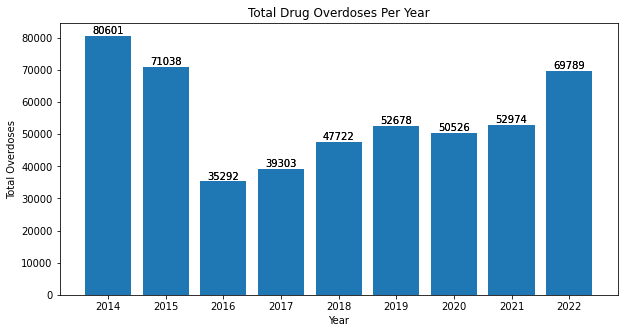

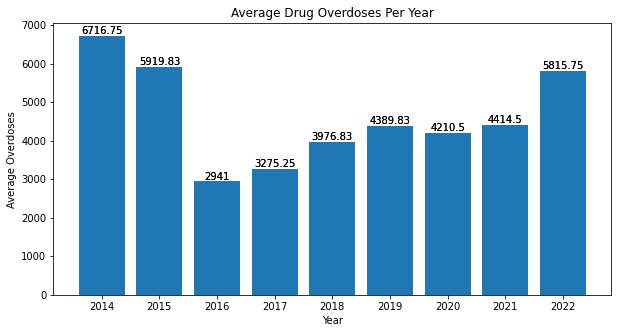

In [53]:
#Plot sum and average overdoses per year

temp=overdoseMonthly.groupby(['Year']).sum().drop(columns=['Month'])
temp1=overdoseMonthly.groupby(['Year']).mean().drop(columns=['Month'])

x= list(set(df_all['Year']))

#Total Deaths
y= list(temp['Drug Overdose'])

fig, ax = plt.subplots(figsize=(10,5))
plt.xticks(x)
plt.title('Total Drug Overdoses Per Year')
plt.xlabel('Year')
plt.ylabel('Total Overdoses')
bars = ax.bar(x, y)

ax.bar_label(bars)
for bars in ax.containers:
    
    ax.bar_label(bars)
plt.savefig("Total Drug Overdoses Per year",dpi=300)

#Avg deaths
y1= list(temp1['Drug Overdose'])

fig, ax = plt.subplots(figsize=(10,5))
plt.xticks(x)
plt.title('Average Drug Overdoses Per Year')
plt.xlabel('Year')
plt.ylabel('Average Overdoses')
bars = ax.bar(x, y1)

ax.bar_label(bars)
for bars in ax.containers:
    
    ax.bar_label(bars)
plt.savefig("Average Drug Overdoses Per year",dpi=300)


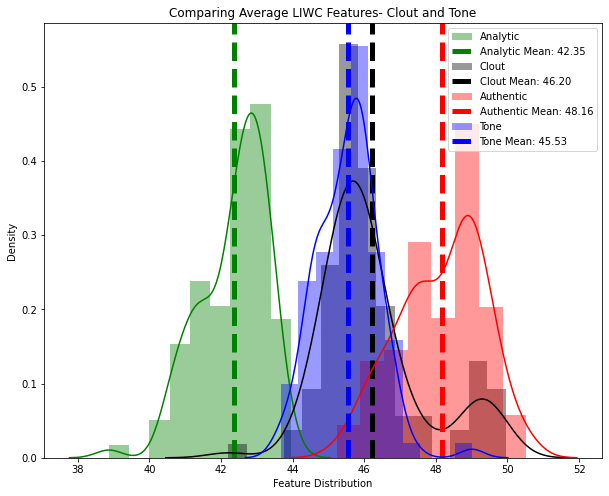

In [54]:
#Compare Average LIWC values
compare_distr_features(df_avg,['Analytic', 'Clout', 'Authentic','Tone'])

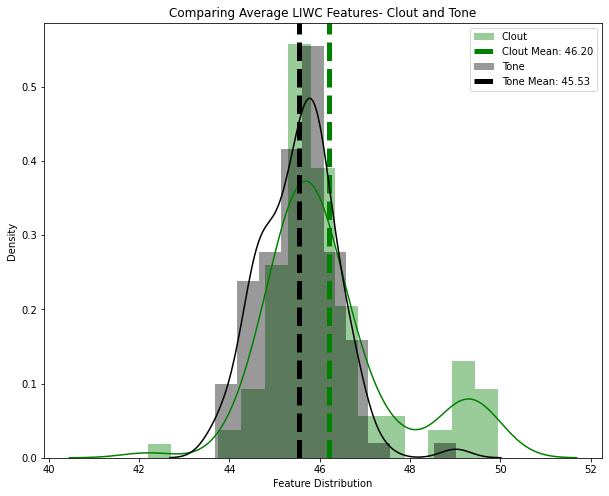

In [55]:
compare_distr_features(df_avg,['Clout', 'Tone'])

In [57]:
#This contains the features used for feature engineering
temp = df_avg[['pronoun', 'ppron','adverb','negate', 'verb', 'adj', 'anx', 'anger', 'sad', 'social', 'family','friend','health', 'sexual', 'ingest', 'drives', 'affiliation', 'achieve', 'power', 'reward', 'risk','work', 'leisure', 'home', 'money', 'relig', 'death', 'informal','swear', 'netspeak', 'assent']]


## Feature Engineering

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#VIF Analysis

vif_data = pd.DataFrame()
vif_data["feature"] = temp.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(temp.values, i)
                          for i in range(len(temp.columns))]
  
print(vif_data)
feature_list= list(vif_data['feature'])
VIF = list(vif_data['VIF'])
plt.figure(figsize=(15,10))
plt.barh(feature_list,VIF)
plt.savefig("VIF plot",dpi=300)

        feature            VIF
0       pronoun   50429.612267
1         ppron   43439.911711
2        adverb    8949.413062
3        negate    3249.946184
4          verb   54423.774068
5           adj    7163.745095
6           anx    1115.113953
7         anger    5683.794189
8           sad     521.750374
9        social    6925.628263
10       family     310.135815
11       friend    1136.699711
12       health    1368.147437
13       sexual     684.432032
14       ingest     550.718818
15       drives  179714.647105
16  affiliation    8481.677809
17      achieve    3026.651492
18        power   16682.412375
19       reward   20488.591721
20         risk    2965.734672
21         work    1352.102022
22      leisure     462.675228
23         home     369.394216
24        money     442.206666
25        relig     217.527827
26        death     231.064022
27     informal   34097.931135
28        swear    4652.197909
29     netspeak    9353.254998
30       assent    1120.233256


In [89]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

#Correlation Test

chi2,p = calculate_bartlett_sphericity(temp1)
print("Chi squared value : ",chi2)
print("p value : ",p)

from factor_analyzer.factor_analyzer import calculate_kmo
kmo_vars,kmo_model = calculate_kmo(temp1)
print('KMO Model:', kmo_model)

Chi squared value :  5208.505603129668
p value :  0.0
KMO Model: 0.8585611912104137


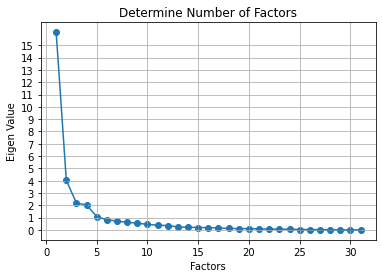

In [61]:
from factor_analyzer import FactorAnalyzer

#Factor Analysis

fa = FactorAnalyzer(rotation = None,impute = "drop",n_factors=temp.shape[1])
fa.fit(temp)
ev,_ = fa.get_eigenvalues()
plt.scatter(range(1,temp.shape[1]+1),ev)
plt.plot(range(1,temp.shape[1]+1),ev)
plt.title('Determine Number of Factors')
plt.xlabel('Factors')
plt.yticks((np.arange(0, 16, step=1)))
plt.ylabel('Eigen Value')

plt.grid()
plt.savefig("Number of factors",dpi=300)



In [45]:
fa = FactorAnalyzer(n_factors=5,rotation='varimax')
fa.fit(temp)

interpreting = (pd.DataFrame(fa.loadings_,index=temp.columns))
variance= (pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))
commonalities= (pd.DataFrame(fa.get_communalities(),index=temp.columns,columns=['Communalities']))

In [93]:
interpreting.sort_values(by=[0,1,2,3,4],ascending=False)

,0,1,2,3,4
netspeak,0.884776,0.040117,0.224192,0.194173,0.195038
informal,0.839116,0.345167,0.307697,0.169830,0.170645
swear,0.720238,0.567439,0.268213,0.152205,0.139603
leisure,0.632404,0.368118,0.010735,0.280154,-0.370591
anger,0.631196,0.723997,0.182655,0.086129,0.013798
friend,0.591599,0.701735,0.202715,0.208844,-0.113384
relig,0.566812,0.555200,0.288600,0.046908,0.190064
money,0.548874,0.595466,0.400613,0.042721,-0.236389
sexual,0.522097,0.762783,0.208013,0.167242,-0.073346
home,0.517832,0.705026,0.125194,0.161705,-0.044366


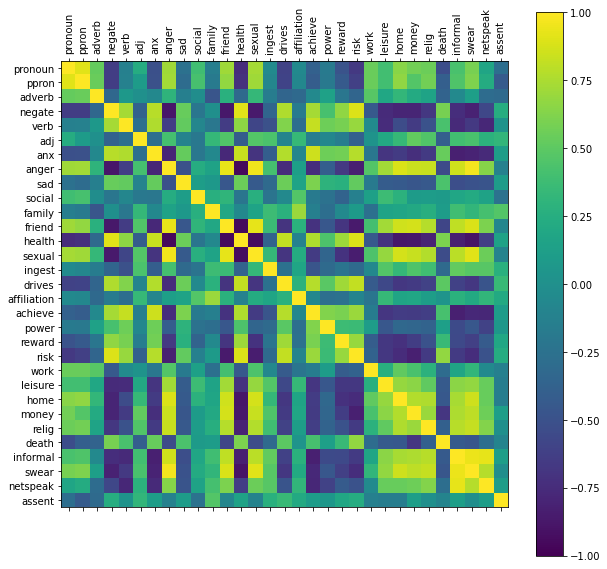

<Figure size 432x288 with 0 Axes>

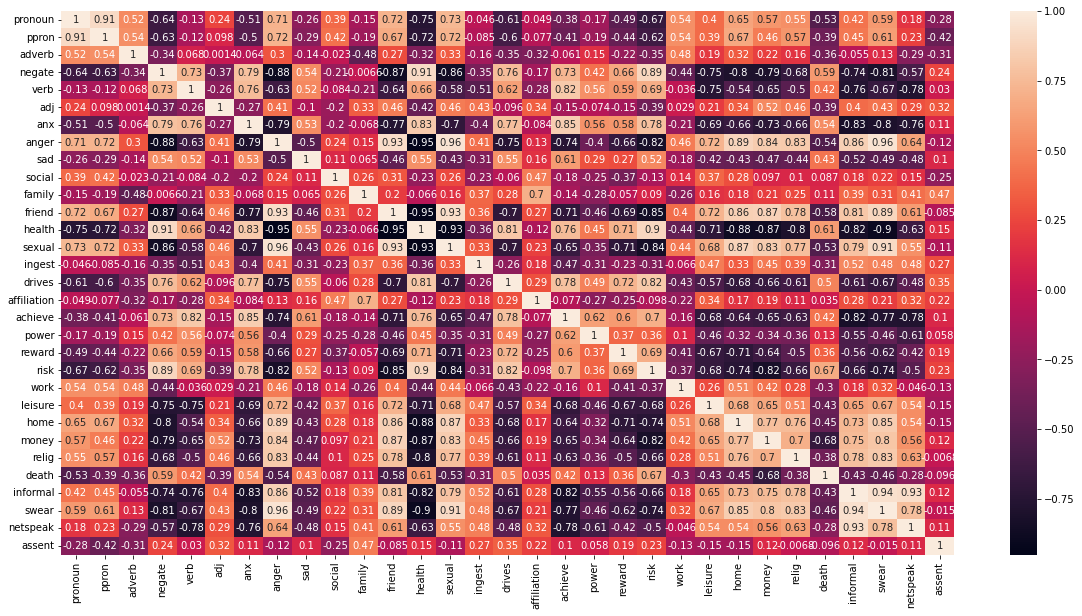

In [62]:
from matplotlib import pyplot as plt
import numpy as np
from pandas import set_option
import seaborn as sns
# set_option('display.width', 100)
# set_option('precision', 2)

#Correlation Matrix

correlations = temp.corr(method='pearson')

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,31,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(temp,rotation='vertical')
ax.set_yticklabels(temp)


plt.show()
plt.savefig("Heat map",dpi=300)

fig = plt.figure(figsize=(20,10))
sns.heatmap(correlations,annot=True)
plt.savefig("Heat map with labels",dpi=300)



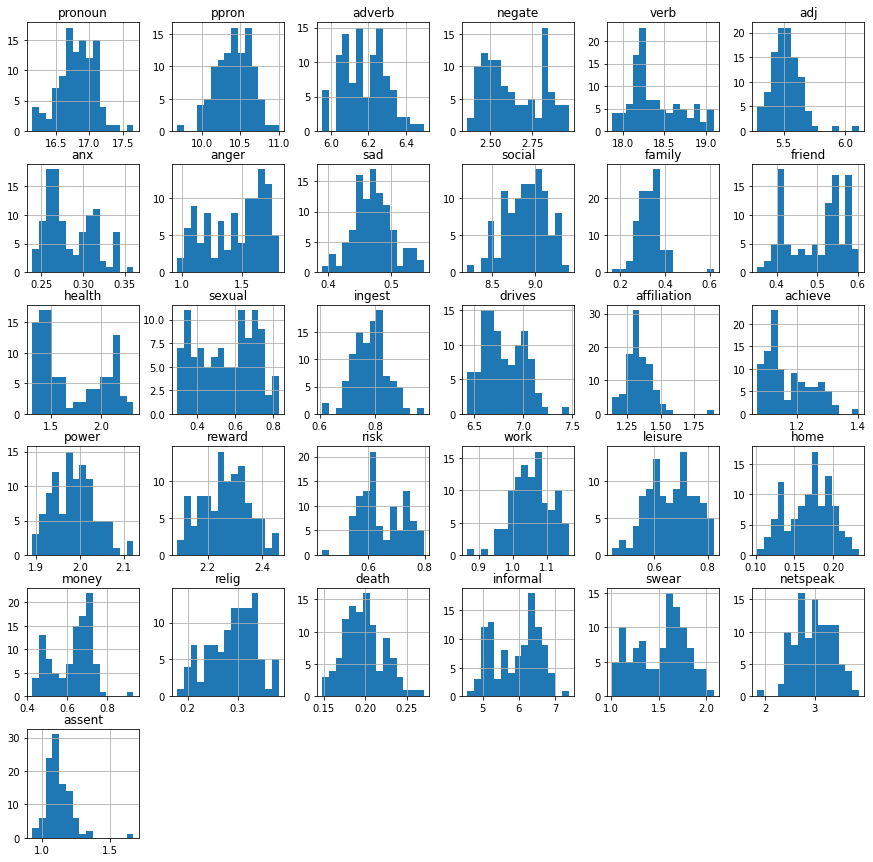

<Figure size 432x288 with 0 Axes>

In [63]:
#Feature Distributions

temp.hist(bins=15,figsize=(15,15))
plt.show()
plt.savefig("Distributions",dpi=300)

# Models

## Classifier

In [35]:
#Convert Class label to discrete bins
df_avg_class = df_avg.copy()
df_avg_class['Drug Overdose'] =  np.digitize(df_avg_class['Drug Overdose'],
                                            bins=[2000,3000,4000,5000,6000,7000,8000])



In [83]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

importance=[]
def evaluate_classifier(classifier, x, y):
    acc = []
    cvs = []
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    acc.append(accuracy_score(y_test, predictions))
    print(f'Accuracy Score {type(classifier).__name__}: {acc[-1]}')
    cv= LeaveOneOut()
    cvs.append(cross_val_score(classifier, x, y,cv=cv).mean())
    cvs.append(cross_val_score(classifier, x, y).mean())
    print(f'Cross val score {type(classifier).__name__}: {cvs[-1]}\n')
    
    if str(classifier) == 'RandomForestClassifier(random_state=42)':
        importance.append(classifier)

    return acc, cvs,importance

In [73]:
acc_list=[]
for i in [50,100,150,200]:
    acc1, cvs1 = evaluate_classifier(RandomForestClassifier(n_estimators=i, random_state=42), x, y)
    acc2, cvs2 = evaluate_classifier(GradientBoostingClassifier(n_estimators=i, random_state=42), x, y)

    le = LabelEncoder()
    y = le.fit_transform(y)
    acc3, cvs3 = evaluate_classifier(XGBClassifier(n_estimators=i, random_state=42), x, y)

    acc = acc1 + acc2 + acc3
    cvs = cvs1 + cvs2 + cvs3
    acc_list.append(acc)
estimators= [50,100,150,200]
acc_list

[[0.7619047619047619, 0.6666666666666666, 0.8571428571428571],
 [0.7619047619047619, 0.7142857142857143, 0.9047619047619048],
 [0.7142857142857143, 0.7142857142857143, 0.9047619047619048],
 [0.6666666666666666, 0.7142857142857143, 0.9047619047619048]]

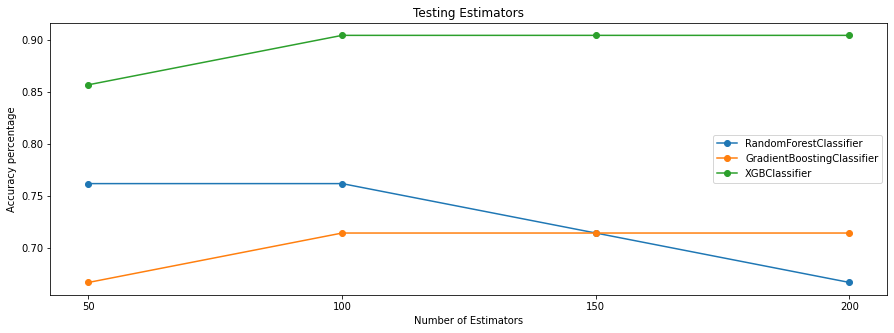

In [74]:
rf=[]
gb=[]
xgb=[]
for i in acc_list:
    rf.append(i[0])
    gb.append(i[1])
    xgb.append(i[2])
    
plt.figure(figsize=(15,5))
plt.plot(estimators,rf,marker='o',label="RandomForestClassifier")
plt.plot(estimators,gb,marker='o',label='GradientBoostingClassifier')
plt.plot(estimators,xgb,marker='o',label='XGBClassifier')
plt.legend()
plt.title("Testing Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy percentage")
plt.xticks([50, 100, 150, 200])
plt.savefig("TestingEstimators",dpi=300)
plt.show()


In [85]:
# DF AVG

# Netspeak, swear, leisure
# Pronoun, ppron
# Affiliation, social, family
# Verb, risk, death, reard
y = df_avg_class['Drug Overdose']
x = df_avg_class[['pronoun', 'ppron','adverb','negate', 'verb', 'adj', 'anx', 'anger', 'sad', 'social', 'family','friend','health', 'sexual', 'ingest', 'drives', 'affiliation', 'achieve', 'power', 'reward', 'risk','work', 'leisure', 'home', 'money', 'relig', 'death', 'netspeak', 'assent']]


importance =[]
print('DF Avg')
acc1, cvs1,importance = evaluate_classifier(RandomForestClassifier(n_estimators=100, random_state=42), x, y)
acc2, cvs2,importance = evaluate_classifier(GradientBoostingClassifier(n_estimators=100, random_state=42), x, y)
le = LabelEncoder()
y = le.fit_transform(y)
acc3, cvs3,importance = evaluate_classifier(XGBClassifier(n_estimators=100, random_state=42), x, y)

acc = acc1 + acc2 + acc3
cvs = cvs1 + cvs2 + cvs3

DF Avg
Accuracy Score RandomForestClassifier: 0.7619047619047619
Cross val score RandomForestClassifier: 0.6914285714285715

Accuracy Score GradientBoostingClassifier: 0.7142857142857143
Cross val score GradientBoostingClassifier: 0.6142857142857143

Accuracy Score XGBClassifier: 0.9047619047619048
Cross val score XGBClassifier: 0.5961904761904762



In [86]:
from prettytable import PrettyTable

def create_pretty_table(metrics, acc, cvs):
    myTable = PrettyTable(metrics)
    myTable.add_row(acc)
    myTable.add_row(cvs[::2])
    myTable.add_row(cvs[1::2])

    fieldname = 'Evaluation Metric'
    myTable._field_names.insert(0, fieldname) 
    myTable._align[fieldname] = 'c' 
    myTable._valign[fieldname] = 't' 
    for i, _ in enumerate(['Accuracy Score','Cross Validation Average Score-LOOCV','Cross Validation Average Score-5 K Fold']): 
        myTable._rows[i].insert(0, _) 
    
    return myTable

myTable_avg = create_pretty_table(['RandomForestClassifier', 'GradientBoostingClassifier', 'XGBClassifier'],
                                  acc[0:3], cvs[0:6])
myTable_avg


Evaluation Metric,RandomForestClassifier,GradientBoostingClassifier,XGBClassifier
Accuracy Score,0.7619047619047619,0.7142857142857143,0.9047619047619048
Cross Validation Average Score-LOOCV,0.7788461538461539,0.7115384615384616,0.6923076923076923
Cross Validation Average Score-5 K Fold,0.6914285714285715,0.6142857142857143,0.5961904761904762


### Feature Importance

In [88]:
avg_importance=pd.DataFrame({'Features':x.columns,'Importance':importance[0].feature_importances_}).sort_values(by='Importance',ascending=False).reset_index(drop=True)
avg_importance



,Features,Importance
0,family,0.085742
1,anger,0.069835
2,risk,0.063603
3,health,0.054686
4,netspeak,0.052758
5,negate,0.048907
6,drives,0.047939
7,adverb,0.044486
8,sexual,0.041738
9,home,0.041691


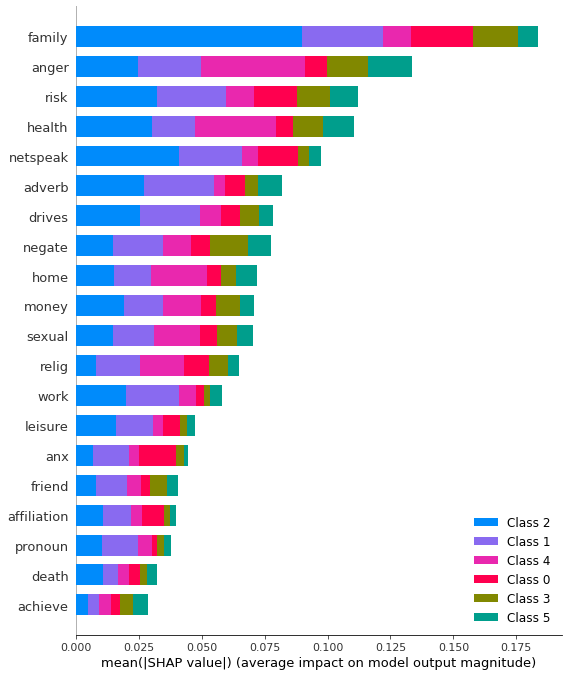

In [89]:
import shap

explainer = shap.TreeExplainer(importance[0])
shap_values = explainer.shap_values(x)

shap.summary_plot(shap_values, x,title="SHAP Summary Plot") 



# Regression

Model = LinearRegression()


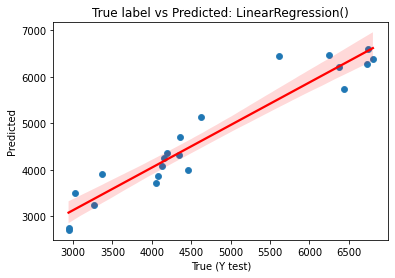

R^2 Score: 0.9154843531345928
MSE: 147224.62555340317
Cross val score MSE: [-1.66878707e+05 -2.15950713e+04 -2.95383479e+04 -5.91279410e+04
 -7.98726028e+02 -1.27630927e+03 -3.55475627e+04 -3.43791095e+04
 -1.00129578e+04 -2.99688458e+04 -4.93089255e+03 -1.29919483e+05
 -4.87867769e+02 -5.92171169e+05 -2.08482746e+03 -5.50450588e+05
 -7.33867724e+05 -6.11841997e+04 -2.36593975e+05 -8.33494510e+04
 -4.71648389e+03 -2.59297253e+04 -6.19166549e+04 -6.94342607e+03
 -2.06243546e+05 -1.60396346e+05 -2.28973611e+04 -1.13788194e+05
 -1.39619253e+04 -1.23516343e+03 -9.66678117e+04 -7.67566267e+04
 -5.29280545e+05 -1.27491490e+04 -7.12960972e+04 -1.12570741e+06
 -2.13379557e+05 -2.07917247e+04 -1.81513324e+05 -8.57093344e+03
 -1.34558530e+04 -8.32335817e+04 -3.72929201e+04 -9.19808347e+03
 -8.67471495e+04 -6.81014219e+03 -5.33213240e+02 -3.66555060e+03
 -3.67474960e+04 -4.85531469e+06 -1.01958298e+05 -2.47769873e+05
 -4.98812813e+05 -2.61482982e+05 -3.95658550e+04 -9.22812107e+04
 -9.88395031e+0

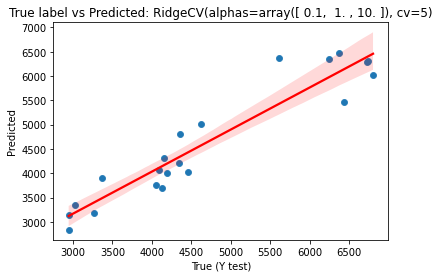

R^2 Score: 0.8948055999265808
MSE: 183246.61450899945
Cross val score MSE: [-8.31222100e+04 -1.93990040e+04 -7.12846699e+04 -3.12958925e+05
 -8.93737131e+01 -5.12127245e+03 -2.17950373e+04 -6.33245220e+03
 -5.56913195e+04 -7.91229160e+03 -6.05980291e+04 -4.70901597e+04
 -1.86433785e+03 -4.96026707e+05 -9.26718086e+04 -2.51008015e+05
 -3.26151952e+05 -1.11079332e+05 -2.48700211e+05 -3.91218244e+04
 -9.03288761e+02 -6.87044754e+03 -4.26278254e+02 -7.43075992e+03
 -1.16200441e+04 -2.56374297e+05 -1.88696167e+05 -3.45866493e+05
 -3.86044725e+04 -1.94853416e+04 -1.34698276e+04 -6.77741345e+04
 -2.56098365e+05 -2.73954888e+02 -2.77460219e-01 -5.53857115e+05
 -3.69868205e+05 -1.46068492e+03 -2.79136556e+05 -7.01838858e+04
 -1.59744212e+04 -9.99471614e+02 -4.87381379e+04 -4.88121705e+04
 -1.62763519e+06 -8.92842191e+03 -2.01232937e+04 -4.06446931e+04
 -2.69939764e+03 -2.26368077e+06 -7.53857683e+04 -3.34846901e+05
 -2.65985557e+05 -1.71290566e+05 -6.10898419e+04 -7.61558870e+04
 -5.31612733e+0

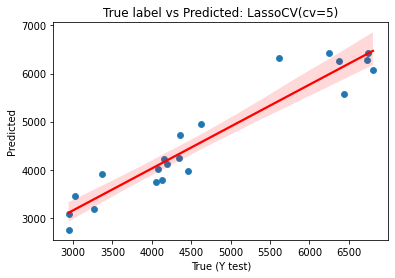

R^2 Score: 0.907290343200958
MSE: 161498.43270039663
Cross val score MSE: [-1.51288524e+05 -5.55704995e+04 -8.09337741e+04 -1.77829024e+05
 -2.75926291e+03 -1.71703768e+03 -3.01884598e+01 -2.71872855e+04
 -2.75607974e+04 -5.36505454e+04 -3.03879140e+03 -5.53176074e+01
 -8.28539721e+02 -6.75921291e+05 -1.78710186e+04 -6.74706855e+05
 -6.01751832e+05 -1.72630452e+05 -2.53464515e+05 -2.70886528e+04
 -1.54210728e+04 -2.14959870e+04 -4.90675007e+04 -5.20954570e+02
 -1.03906601e+05 -2.92427131e+05 -1.13868072e+05 -2.25989382e+05
 -1.61664557e+04 -1.43615024e+03 -3.65866585e+04 -6.41084347e+04
 -4.66302781e+05 -1.01302303e+03 -5.88164875e+03 -1.00020127e+06
 -3.10841994e+05 -1.24659884e+04 -2.39811936e+05 -2.92883657e+04
 -2.15186642e+03 -3.36990295e+04 -6.48339364e+04 -3.46499306e+02
 -2.63310107e+06 -2.03905309e+04 -3.23420591e+03 -6.76987184e+03
 -1.96228616e+04 -3.21707279e+06 -1.10856274e+05 -3.92417591e+05
 -3.77436497e+05 -2.56469622e+05 -3.60143572e+04 -1.32210121e+05
 -3.85919193e+02

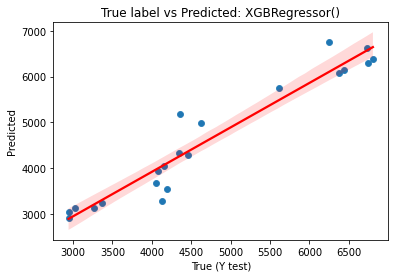

R^2 Score: 0.9163068073231104
MSE: 145791.92623167663
Cross val score MSE: [-3.88978484e+05 -3.48771275e+05 -1.91922601e+04 -1.21566628e+05
 -3.54314446e+00 -1.09307079e+05 -7.84501838e+04 -7.05681844e+04
 -1.26013560e+05 -2.23798970e+04 -2.94922763e+04 -5.39630858e+04
 -1.85919713e+03 -1.81414019e+05 -1.27124107e+05 -1.96099817e+04
 -8.15144322e+04 -2.19572323e+05 -7.33929368e+03 -1.35453000e+02
 -5.12761527e+04 -1.00558665e+05 -3.24068077e+05 -2.97371048e+05
 -1.99708787e+04 -4.52464622e+04 -4.98692510e+05 -1.73237845e+05
 -3.83805055e+05 -2.31918901e+03 -2.46519898e+04 -8.81695591e+04
 -3.50128419e+04 -5.71917416e+02 -1.73865085e+04 -7.63507752e+05
 -2.41456589e+05 -1.15888169e+02 -4.96277869e+04 -4.32685166e+03
 -3.16800021e+04 -1.47087863e+04 -5.20173389e+03 -5.74103127e+02
 -1.54793389e+06 -7.89615488e+02 -3.88163109e+04 -2.70355164e+04
 -1.22831767e+03 -3.25118933e+04 -2.00982346e+03 -2.19336389e+04
 -8.63424277e+04 -5.43215063e+03 -1.04193455e+02 -1.58418114e+02
 -4.15549574e+0

In [91]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import LeaveOneOut

# Define functions to perform regression and print evaluation metrics
def regression_model(model,x,y, x_train, y_train, x_test, y_test):
    reg = model
    reg.fit(x_train, y_train)
    predictions = reg.predict(x_test)

   # Create a scatter plot of predicted vs expected values
    sns.scatterplot(x=y_test, y=predictions)
    sns.regplot(x=y_test_avg, y=predictions, line_kws={'color': 'red'})
    plt.xlabel("True (Y test)")
    plt.ylabel("Predicted")
    if model == reg_models[3]:
        model= "XGBRegressor()"
    plt.title("True label vs Predicted: {}".format(model))
    plt.show()
   

    cv= LeaveOneOut()
    print('R^2 Score:', reg.score(x_test, y_test))
   
    print('MSE:', mean_squared_error(y_test, predictions))
    print('Cross val score MSE:', cross_val_score(reg, x, y, scoring='neg_mean_squared_error',cv=cv))
    print('Cross val score MSE Avg:', -1*cross_val_score(reg, x, y, scoring='neg_mean_squared_error',cv=cv).mean(), '\n')
    return reg.score(x_test, y_test), mean_squared_error(y_test, predictions), -1*cross_val_score(reg, x, y, scoring='neg_mean_squared_error',cv=cv).mean()

# Split the data into training and testing sets
y_avg = df_avg['Drug Overdose']

#Removed Drives
x_avg = df_avg[['pronoun', 'ppron','adverb','negate', 'verb', 'adj', 'anx', 'anger', 'sad', 'social', 'family','friend','health', 'sexual', 'ingest', 'affiliation', 'achieve', 'power', 'reward', 'risk','work', 'leisure', 'home', 'money', 'relig', 'death', 'netspeak', 'assent']]

x_train_avg, x_test_avg, y_train_avg, y_test_avg = train_test_split(x_avg, y_avg, test_size=0.20, random_state=42)



# Define the regression models
reg_models = [LinearRegression(), RidgeCV(cv=5), LassoCV(cv=5), XGBRegressor()]

# Evaluate each model on the two datasets
results_avg = []
results_sum = []
for model in reg_models:
    print('Model =', str(model))
    r2_avg, mse_avg, mse_cv_avg = regression_model(model,x_avg,y_avg, x_train_avg, y_train_avg, x_test_avg, y_test_avg)
    #r2_sum, r2_cv_sum, mse_sum, mse_cv_sum = regression_model(model,x_sum,y_sum, x_train_sum, y_train_sum, x_test_sum, y_test_sum)
    results_avg.append([r2_avg, mse_avg, mse_cv_avg])
    #results_sum.append([r2_sum, r2_cv_sum, mse_sum, mse_cv_sum])

# Create PrettyTables to display the evaluation metrics
from prettytable import PrettyTable

# For the average dataset
avg_table = PrettyTable()
avg_table.field_names = ['Metrics'] + [str(model) if model != reg_models[3] else "XGBRegressor()" for model in reg_models ]
for i, metric in enumerate(['R^2 Score', 'MSE', 'Cross Val MSE Avg']):
    row = [metric]
    row.extend([results_avg[j][i] for j in range(len(reg_models))])
    avg_table.add_row(row)




In [22]:
avg_table

Metrics,LinearRegression(),"RidgeCV(alphas=array([ 0.1, 1. , 10. ]), cv=5)",LassoCV(cv=5),XGBRegressor()
R^2 Score,0.9154843531345928,0.8948055999265808,0.907290343200958,0.9163068073231104
MSE,147224.62555340317,183246.61450899945,161498.43270039663,145791.92623167663
Cross Val MSE Avg,330155.2250258535,285421.7931919859,323124.52273181203,264124.45000954776


# Topic Clustering Analysis

In [99]:
data[6]

'Just get some food in your stomach and drink as much water as you can.  Sleep it off.'

In [24]:
import gensim
from gensim.utils import simple_preprocess
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','https','com','reddit','www','rules','also','amp','sub','know','people','someone','wiki'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = df_comments['B']
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)

In [100]:
data_words[6]

['get', 'food', 'stomach', 'drink', 'much', 'water', 'sleep']

'Just get some food in your stomach and drink as much water as you can.  Sleep it off.'

['get', 'food', 'stomach', 'drink', 'much', 'water', 'sleep']

In [81]:
from pprint import pprint
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])
# number of topics
num_topics = 5
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]
[(0,
  '0.018*"get" + 0.012*"like" + 0.010*"got" + 0.009*"shit" + 0.007*"dope" + '
  '0.007*"one" + 0.007*"money" + 0.007*"would" + 0.007*"lol" + 0.006*"good"'),
 (1,
  '0.034*"opiates" + 0.012*"questions" + 0.012*"find" + 0.011*"sad" + '
  '0.010*"lol" + 0.009*"please" + 0.008*"like" + 0.008*"thanks" + 0.008*"much" '
  '+ 0.008*"hope"'),
 (2,
  '0.026*"mg" + 0.014*"take" + 0.014*"like" + 0.011*"oxy" + 0.010*"get" + '
  '0.009*"high" + 0.009*"dose" + 0.009*"would" + 0.009*"tolerance" + '
  '0.008*"much"'),
 (3,
  '0.015*"like" + 0.011*"never" + 0.009*"time" + 0.009*"one" + 0.007*"got" + '
  '0.007*"shit" + 0.006*"would" + 0.006*"even" + 0.005*"really" + '
  '0.005*"back"'),
 (4,
  '0.015*"get" + 0.010*"like" + 0.008*"pain" + 0.008*"day" + 0.007*"life" + '
  '0.007*"time" + 0.007*"feel" + 0.007*"would" + 0.007*"days" + 0.006*"go"')]


In [82]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
import os
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.056412 -0.012593       1        1  31.141973
3      0.038739  0.064100       2        1  20.382880
2      0.157846 -0.123654       3        1  18.911892
0      0.007114  0.136633       4        1  18.323843
1     -0.260112 -0.064486       5        1  11.239412, topic_info=                   Term           Freq          Total Category  logprob  \
44                   mg  344017.000000  344017.000000  Default  30.0000   
228             opiates  412057.000000  412057.000000  Default  29.0000   
232                 oxy  155975.000000  155975.000000  Default  28.0000   
1488          questions   97266.000000   97266.000000  Default  27.0000   
1512                sad   91763.000000   91763.000000  Default  26.0000   
143                take  341471.000000  341471.000000  Default  25.0000   
144           tolerance  119170.000000  119170.000000  Default  24.0000   
26                 dose  143313.000000  143313.000000  Default  23.0000   
426                find  209025.000000  209025.000000  Default  22.0000   
233                pain  180007.000000  180007.000000  Default  21.0000   
10                  lol  240034.000000  240034.000000  Default  20.0000   
6591               fent  177463.000000  177463.000000  Default  19.0000   
535              please   90064.000000   90064.000000  Default  18.0000   
481               money  139416.000000  139416.000000  Default  17.0000   
476                hope  115736.000000  115736.000000  Default  16.0000   
919             message   58010.000000   58010.000000  Default  15.0000   
1386             thanks   95548.000000   95548.000000  Default  14.0000   
1493           comments   52937.000000   52937.000000  Default  13.0000   
1598           morphine   69191.000000   69191.000000  Default  12.0000   
4464          subreddit   52021.000000   52021.000000  Default  11.0000   
697                life  191839.000000  191839.000000  Default  10.0000   
811                post   67282.000000   67282.000000  Default   9.0000   
601                 buy   66871.000000   66871.000000  Default   8.0000   
656               thank   76836.000000   76836.000000  Default   7.0000   
6703                bot   47140.000000   47140.000000  Default   6.0000   
4009            contact   50620.000000   50620.000000  Default   5.0000   
8116            compose   47138.000000   47138.000000  Default   4.0000   
67                water   66208.000000   66208.000000  Default   3.0000   
5                  high  234713.000000  234713.000000  Default   2.0000   
3425           concerns   45473.000000   45473.000000  Default   1.0000   
15106      psychiatrist    3012.138938    3013.194742   Topic1  -8.8795   
6508               paws    6771.582152    6774.087445   Topic1  -8.0694   
13167          vivitrol    4762.210599    4763.999311   Topic1  -8.4214   
1987            therapy   10273.079966   10277.184169   Topic1  -7.6526   
1253           cravings   16555.209416   16561.921422   Topic1  -7.1754   
12922         induction    2043.215276    2044.067376   Topic1  -9.2676   
25437           bipolar    1840.508875    1841.335951   Topic1  -9.3721   
1116          relapsing    4424.694620    4426.825225   Topic1  -8.4949   
2783          diagnosis    1990.754844    1991.966467   Topic1  -9.2936   
30335           prayers    1328.901476    1329.728368   Topic1  -9.6978   
7615          therapist    3650.267759    3652.586788   Topic1  -8.6873   
9483            boredom    2018.749725    2020.032606   Topic1  -9.2797   
2298         medicating    1475.377726    1476.329147   Topic1  -9.5932   
1115            relapse   18251.334387   18263.133081   Topic1  -7.0779   
6527           medicate    1352.440890    1353.326977   Topic1  -9.6802   
2352              goals    1753.189795    1754.616931   Topic1  -9.4207   
11054    accomplishment    1109.794686    1110.777080 